In [321]:
# Relu network => piecewise linear
# We investigate the distribution of corners throughout training

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [322]:
# step 1: generate data #
num = 1001
c = 1
x = np.linspace(-c,c,num=num)
y = (x/c)**2
x = torch.tensor(x, dtype=torch.float, requires_grad=True).unsqueeze(dim=1)
y = torch.tensor(y, dtype=torch.float, requires_grad=True).unsqueeze(dim=1)

In [323]:
# step 2: construct NN (1 hidden layer) #

class Net(nn.Module):

    def __init__(self, w=1000):
        super(Net, self).__init__()
        self.l1 = nn.Linear(1, w)
        self.l2 = nn.Linear(w, 1)

    def forward(self, x):
        #f = torch.nn.LeakyReLU(0.3)
        f = torch.nn.Tanh()
        self.x1 = f(self.l1(x))
        self.x2 = self.l2(self.x1)
        return self.x2
    
model = Net()

tensor(506)


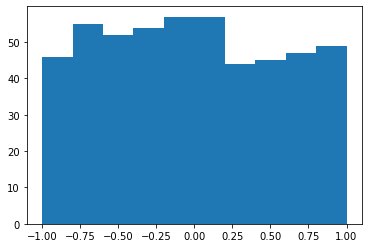

In [324]:
# step 3: obtain locations of corners
corners = -model.l1.bias/model.l1.weight[:,0]
plt.hist(corners.detach().numpy(), range=(-c,c))

print(torch.sum((corners < c)*(corners > -c)))

In [325]:
# step 4: training

seed = 1
np.random.seed(seed)
torch.manual_seed(seed)

model = Net()

epochs = 200
log = 10

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
cornerss = []

for epoch in range(epochs):  # loop over the dataset multiple times

    optimizer.zero_grad()

    outputs = model(x)
    loss = torch.mean((outputs-y)**2)
    loss.backward()
    optimizer.step()
    corners = -model.l1.bias/model.l1.weight[:,0]
    cornerss.append(corners.detach().numpy())
    
    if epoch % log == 0:
        print("epoch: %d  | loss: %.8f"%(epoch, loss.detach().numpy()))
        
cornerss = np.array(cornerss)

epoch: 0  | loss: 0.41599569
epoch: 10  | loss: 0.15223886
epoch: 20  | loss: 0.08642653
epoch: 30  | loss: 0.07416496
epoch: 40  | loss: 0.05713199
epoch: 50  | loss: 0.04378337
epoch: 60  | loss: 0.03347452
epoch: 70  | loss: 0.02465054
epoch: 80  | loss: 0.01758342
epoch: 90  | loss: 0.01213235
epoch: 100  | loss: 0.00812769
epoch: 110  | loss: 0.00532493
epoch: 120  | loss: 0.00346418
epoch: 130  | loss: 0.00229724
epoch: 140  | loss: 0.00160851
epoch: 150  | loss: 0.00122733
epoch: 160  | loss: 0.00102972
epoch: 170  | loss: 0.00093357
epoch: 180  | loss: 0.00088925
epoch: 190  | loss: 0.00086929


In [326]:
c1 = c
np.sum((cornerss < c1)*(cornerss > -c1), axis=1)

array([512, 511, 512, 514, 514, 514, 514, 515, 514, 513, 512, 512, 513,
       513, 512, 512, 513, 513, 512, 512, 512, 513, 512, 512, 513, 513,
       514, 514, 514, 515, 515, 516, 516, 516, 516, 516, 516, 516, 517,
       517, 517, 517, 517, 516, 516, 516, 517, 516, 516, 516, 515, 514,
       513, 513, 513, 513, 513, 514, 514, 513, 513, 514, 515, 515, 515,
       515, 515, 514, 514, 513, 514, 514, 513, 513, 513, 513, 513, 514,
       513, 514, 514, 514, 514, 514, 514, 515, 516, 516, 516, 516, 516,
       515, 514, 513, 513, 513, 513, 513, 513, 513, 513, 513, 514, 514,
       514, 514, 514, 515, 515, 515, 516, 517, 516, 517, 517, 517, 517,
       518, 518, 518, 518, 517, 517, 517, 516, 516, 516, 516, 516, 516,
       516, 516, 516, 516, 516, 516, 516, 516, 516, 516, 515, 515, 515,
       515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515,
       515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515,
       515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 51

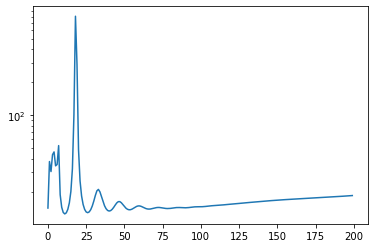

In [327]:
stds = np.std(cornerss, axis=1)
plt.plot(range(epochs), stds)
plt.yscale('log')

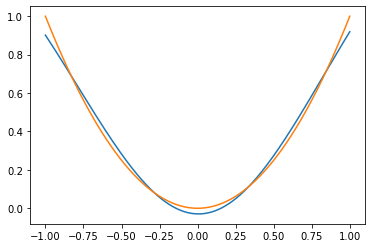

In [328]:
plt.plot(x.detach().numpy(), outputs[:,0].detach().numpy())
plt.plot(x.detach().numpy(), y.detach().numpy())